In [209]:
#imports
import json
from os import listdir
from os.path import isfile, join
from types import SimpleNamespace
import pandas as pd

In [210]:
class verkiezings_programma:
    def __init__(self, party, orderedList):
        self.party_name = party
        self.ordered_list = orderedList

def object_decoder(obj):
    return verkiezings_programma(obj['party'], obj['orderedList'])

In [211]:
#read json and turn into verkiezing programmas
fileNames = [f for f in listdir('output/') if isfile(join('output/', f))]
print(fileNames)
verkiezings_programmas = []
for fileName in fileNames:
    with open(f'output/{fileName}', encoding="utf8") as jsonFile:
        dictio = json.load(jsonFile)
        vp = object_decoder(dictio)
        verkiezings_programmas.append(vp)

['50Plus.json', 'BIJ1.json', 'CDA.json', 'CU.json', 'D66.json', 'DENK.json', 'FvD.json', 'Groenlinks.json', 'JA21.json', 'PiratenPartij.json', 'PvdA.json', 'PvdD.json', 'PVV.json', 'SGP.json', 'SP.json', 'Volt.json', 'VVD.json']


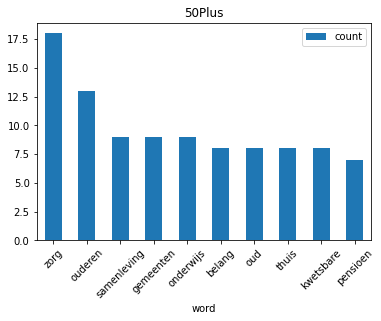

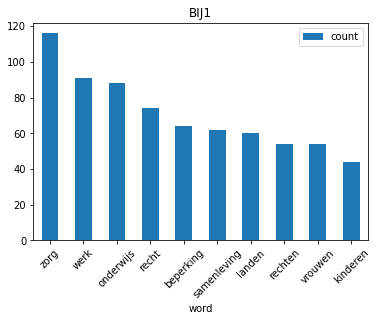

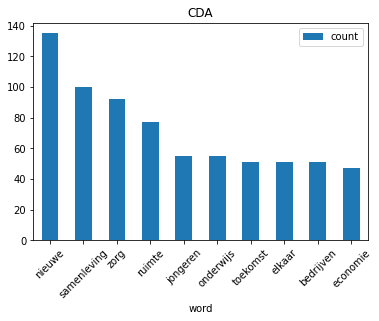

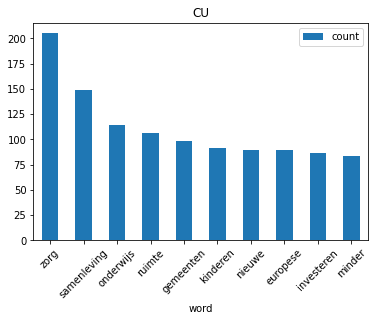

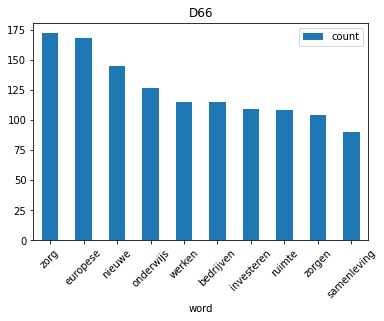

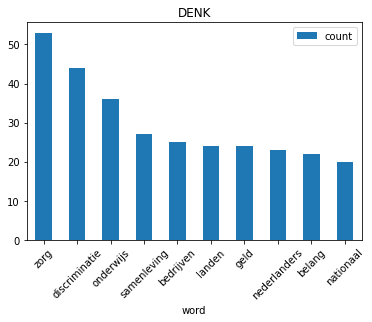

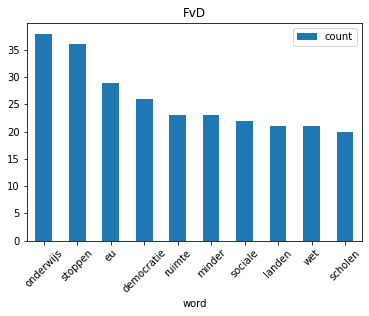

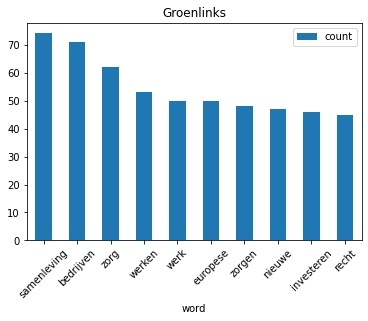

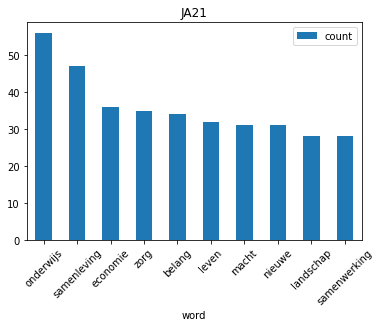

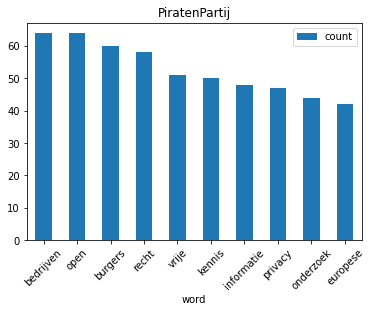

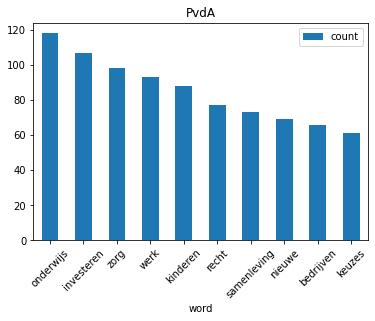

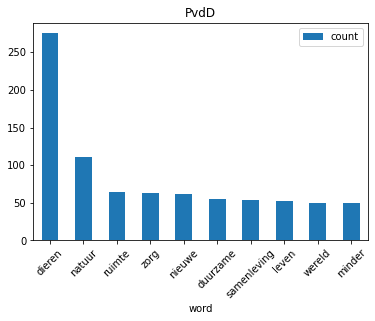

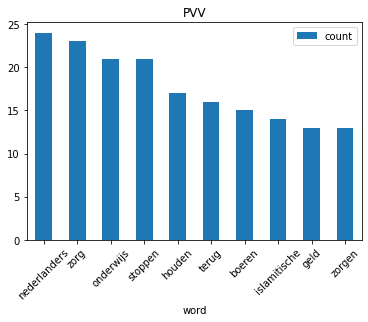

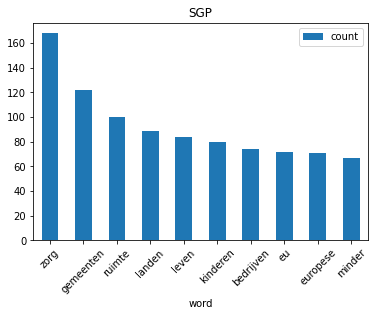

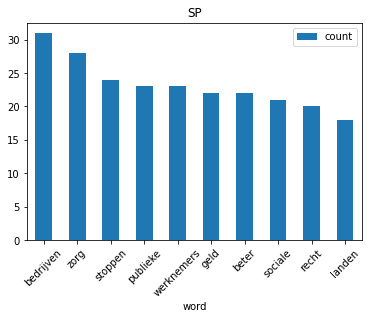

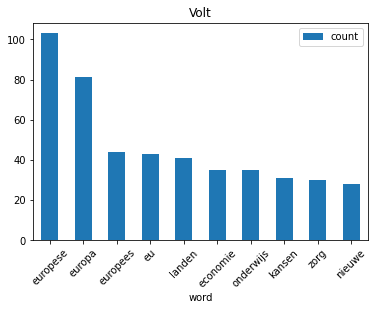

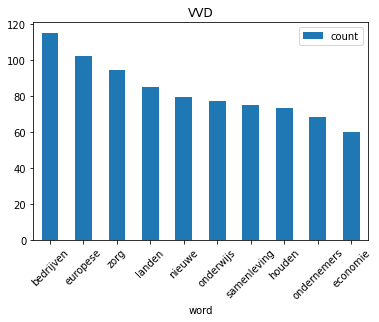

In [212]:
dfs = []
for verkiezings_programma in verkiezings_programmas:
    snippet = verkiezings_programma.ordered_list[:10]
    dfs.append(pd.DataFrame({'party_name': verkiezings_programma.party_name, 'word':[s['word'] for s in snippet], 'count':[s['count']      for s in snippet]}))

for index, dataframe in enumerate(dfs): 
    ax = dataframe.plot.bar(title=verkiezings_programmas[index].party_name, x='word', y='count', rot=45)